In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv(r"D:\Desktop\Fall\DATA1030\project1\auto+mpg\auto_mpg_with_brands.csv")
#drop null in target varaible
data = data[data['mpg'].notna()]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1
...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,1
402,44.0,4,97.0,52.0,2130,24.6,2
403,32.0,4,135.0,84.0,2295,11.6,1
404,28.0,4,120.0,79.0,2625,18.6,1


In [3]:

data_head = data.head()
print("data head:")
print(data_head)

print()
print("data info:")
data.info()

#closer look to cylinders
pd.value_counts(data['cylinders'])

X = data.loc[:, data.columns != 'mpg']

y = data['mpg']




data head:
    mpg  cylinders  displacement  horsepower  weight  acceleration  origin
0  18.0          8         307.0       130.0    3504          12.0       1
1  15.0          8         350.0       165.0    3693          11.5       1
2  18.0          8         318.0       150.0    3436          11.0       1
3  16.0          8         304.0       150.0    3433          12.0       1
4  17.0          8         302.0       140.0    3449          10.5       1

data info:
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage

**EDA Part:**

In [4]:
#Check each features
for name in data.columns:
    print(name, ": ")
    print(data[name].describe())
    print()

mpg : 
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

cylinders : 
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

displacement : 
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

horsepower : 
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

weight : 
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Na

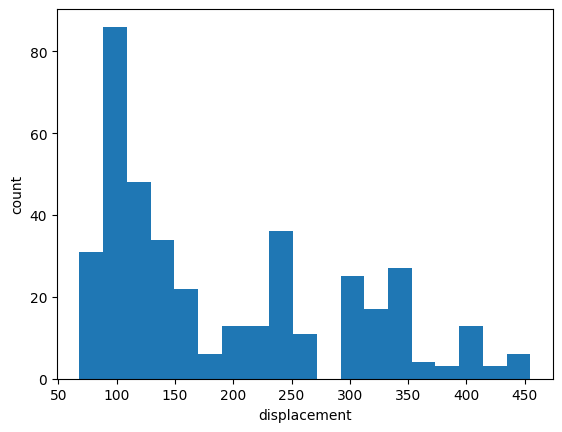

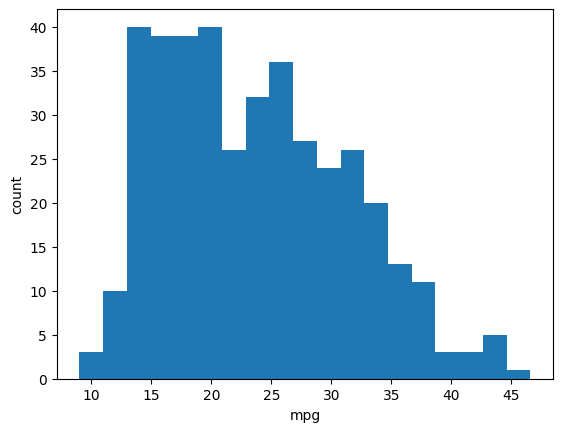

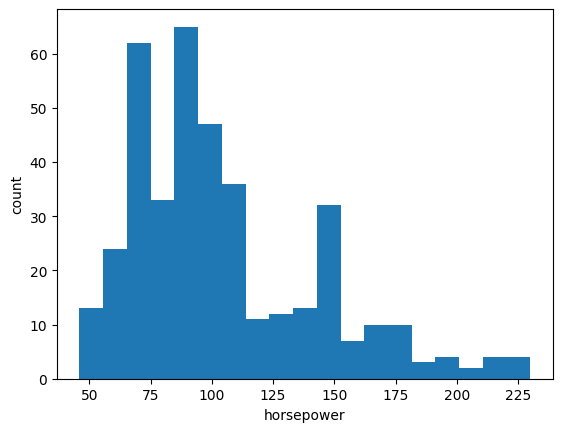

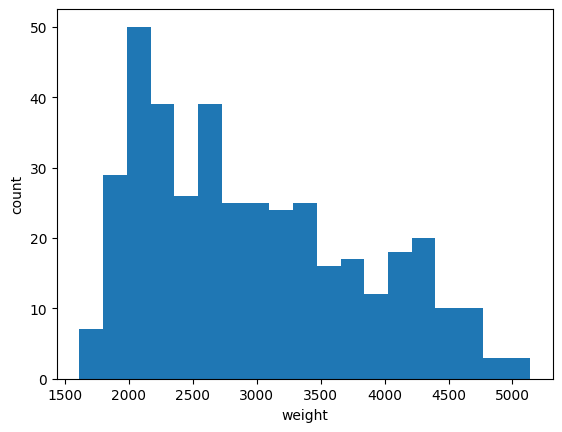

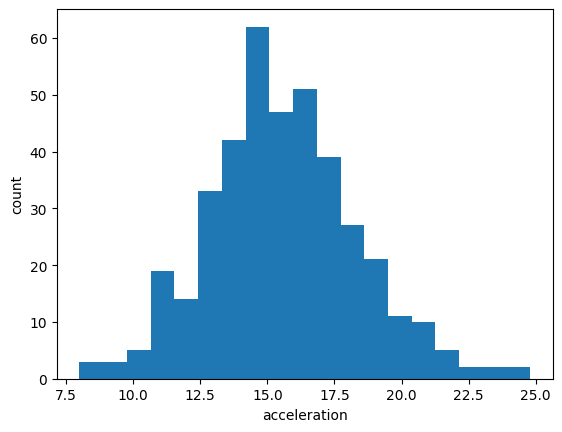

cylinders : 
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

origin : 
origin
1    249
3     79
2     70
Name: count, dtype: int64



In [5]:

for name in ['displacement', 'mpg', 'horsepower', 'weight', 'acceleration']:
    data[name].plot.hist(bins =int(np.sqrt(data.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
    plt.xlabel(name)
    plt.ylabel('count')
    plt.show()



for name in ['cylinders', 'origin']:
    print(name, ": ")
    print(pd.value_counts(data[name]))
    print()

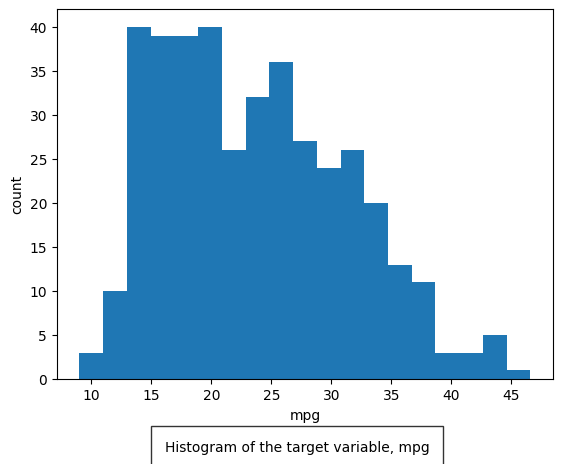

In [6]:
data['mpg'].plot.hist(bins =int(np.sqrt(data.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('mpg')
plt.ylabel('count')
plt.figtext(0.5, -0.04, "Histogram of the target variable, mpg",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\hist_mpg", dpi=300, bbox_inches='tight')
plt.show()


                   mpg  displacement  horsepower    weight  acceleration
mpg           1.000000     -0.804203   -0.778427 -0.831741      0.420289
displacement -0.804203      1.000000    0.897257  0.932824     -0.543684
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196
weight       -0.831741      0.932824    0.864538  1.000000     -0.417457
acceleration  0.420289     -0.543684   -0.689196 -0.417457      1.000000


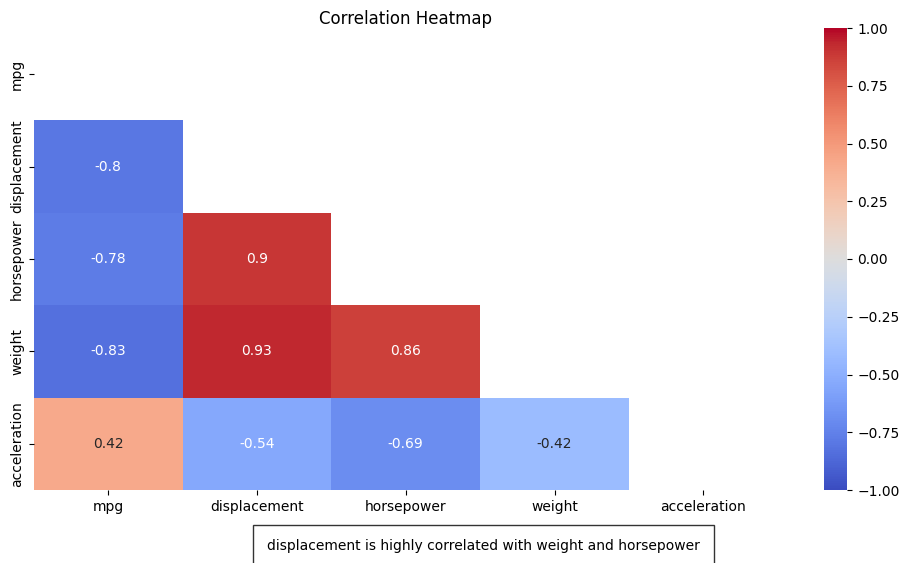

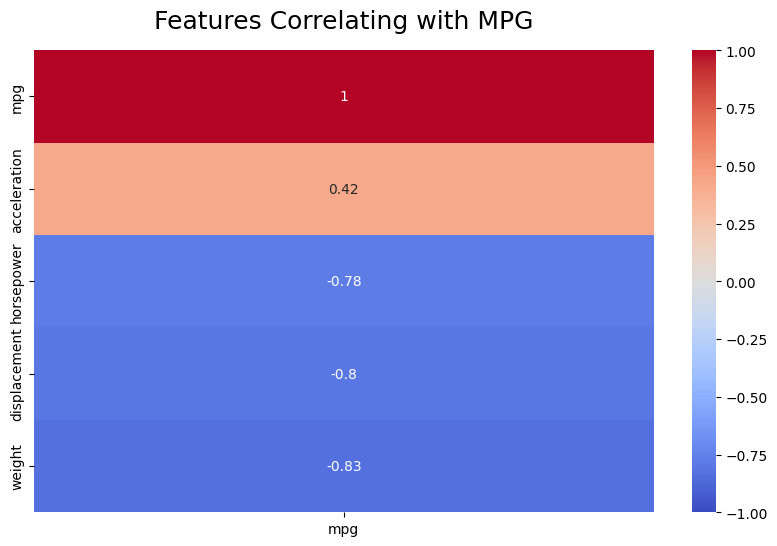

In [7]:
data_num = data.loc[:, data.columns != 'brand']
data_num = data_num.loc[:, data.columns != 'cylinders']
data_num = data_num.loc[:, data_num.columns != 'origin']

print(data_num.corr())
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_num.corr()))
heatmap = sns.heatmap(data_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')#cmap='BrBG'
plt.xticks(rotation=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=1)
plt.figtext(0.5, 0.01, "displacement is highly correlated with weight and horsepower",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\correlation_1", dpi=300)
plt.show()


plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data_num.corr()[['mpg']].sort_values(by='mpg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with MPG', fontdict={'fontsize':18}, pad=16)
plt.show()

In [8]:
#DROP highly correlated features
X = X.loc[:, X.columns != 'displacement']

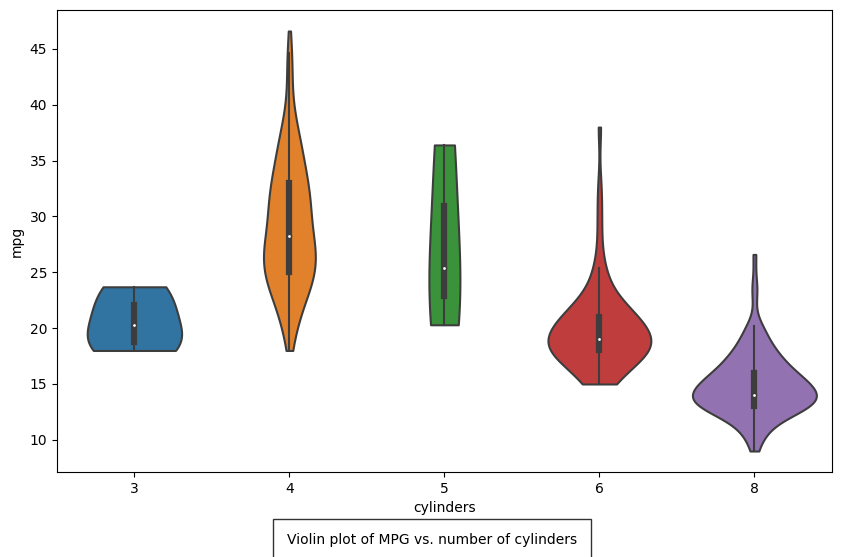

In [9]:
plt.figure(figsize=(10,6))
graph = sns.violinplot(data = data, x = data['cylinders'], y = data['mpg'], 
                       cut = 0)
plt.figtext(0.5, -0.01, "Violin plot of MPG vs. number of cylinders",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\mpg_cylinders", dpi=300, bbox_inches='tight')

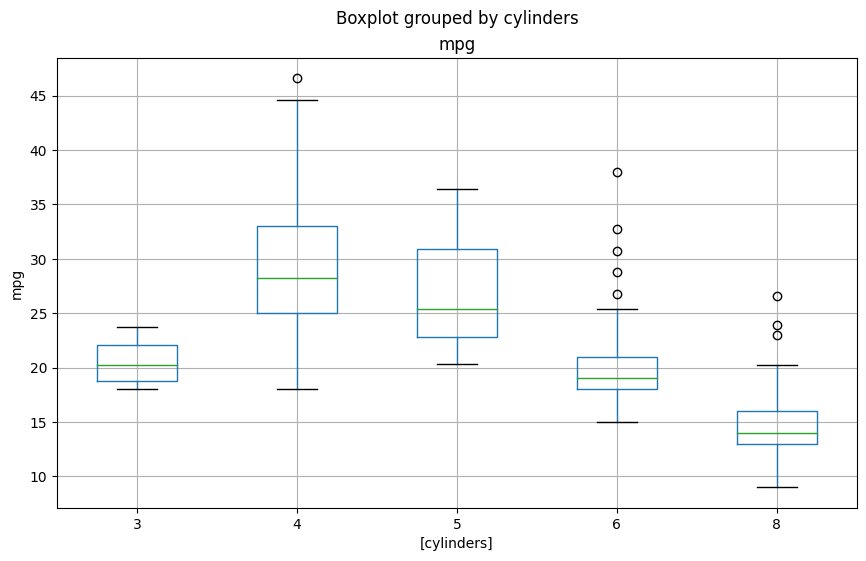

In [10]:
data[['mpg','cylinders']].boxplot(by='cylinders',figsize=(10, 6))
plt.ylabel('mpg')
plt.show()

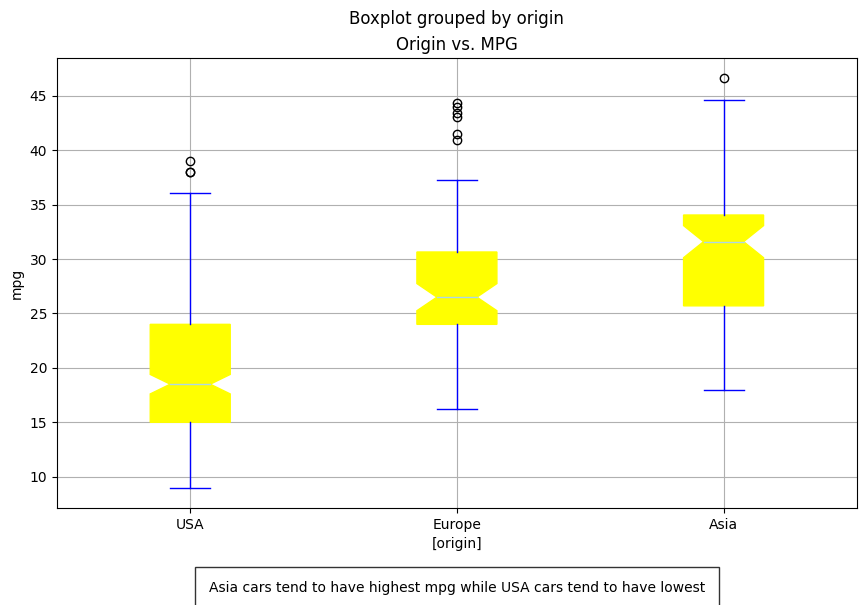

In [11]:
c = 'yellow'
data[['mpg','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                               boxprops=dict(facecolor='yellow', color='yellow'),
                               medianprops=dict(color='lightblue'),
                               whiskerprops=dict(color='blue'),
                               capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. MPG')
plt.ylabel('mpg')
plt.figtext(0.5, 0.01, "Asia cars tend to have highest mpg while USA cars tend to have lowest",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\Box_origin_mpg", dpi=300)
plt.show()

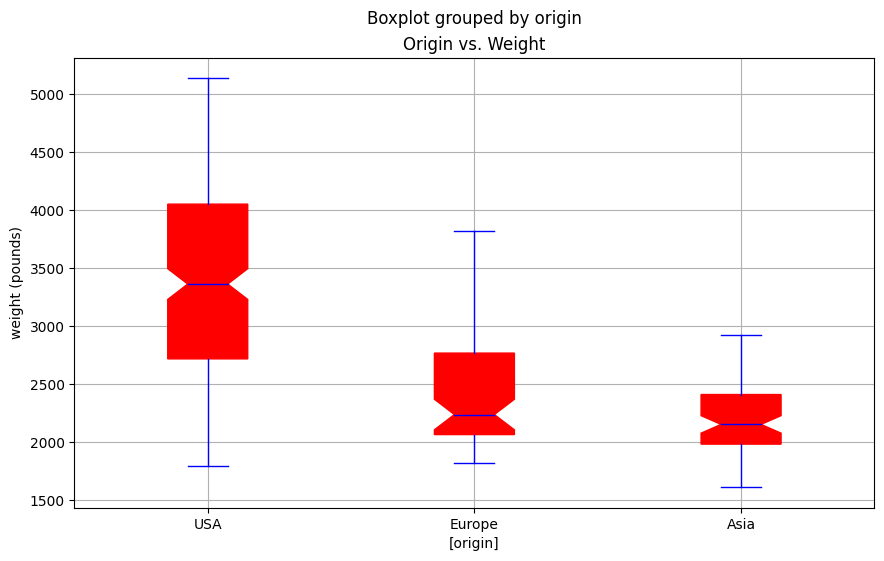

In [12]:
box = data[['weight','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                                         boxprops=dict(facecolor='red', color='red'),
                                        medianprops=dict(color='blue'),
                                        whiskerprops=dict(color='blue'),
                                        capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. Weight')
plt.ylabel('weight (pounds)')
plt.show()

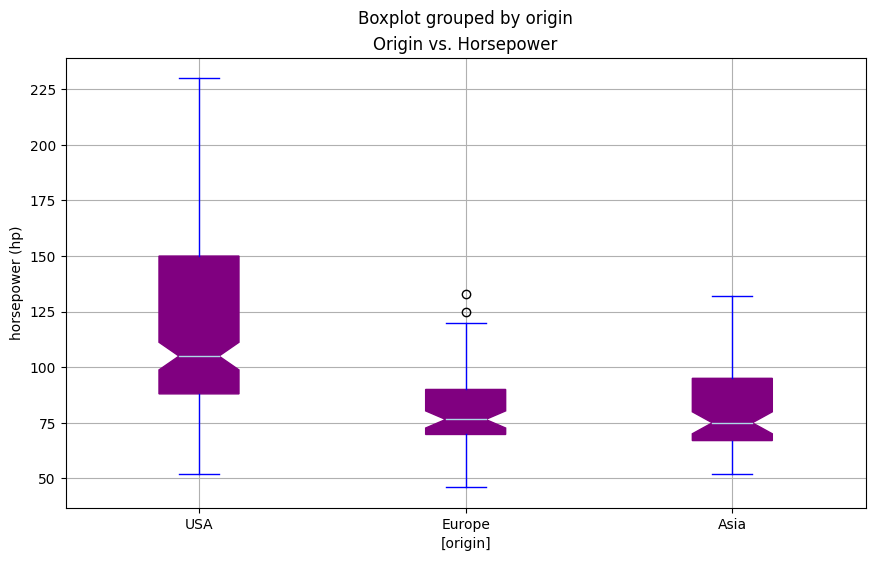

In [13]:
data[['horsepower','origin']].boxplot(by='origin',figsize=(10, 6), notch=True, patch_artist=True,
                                         boxprops=dict(facecolor='purple', color='purple'),
                                        medianprops=dict(color='lightblue'),
                                        whiskerprops=dict(color='blue'),
                                        capprops=dict(color='blue'))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.title('Origin vs. Horsepower')
plt.ylabel('horsepower (hp)')
plt.show()

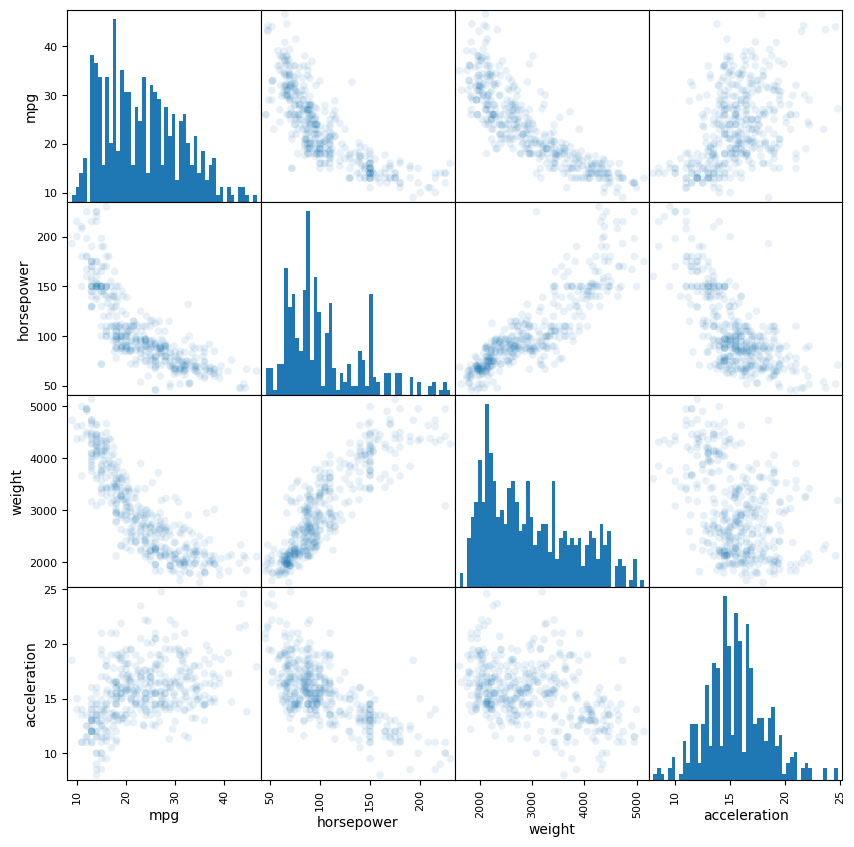

In [14]:
data_scatter = data[['mpg', 'horsepower', 'weight', 'acceleration']]
pd.plotting.scatter_matrix(data_scatter, figsize=(10, 10), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

In [15]:
#baseline
from sklearn.metrics import mean_squared_error
y_mean = [np.mean(y)]*len(y)

baseline = np.sqrt(mean_squared_error(y, y_mean))
print('The baseline for this dataset is: ', baseline)

The baseline for this dataset is:  7.806159061274433


In [16]:
#define preprocessoe for X for further impute
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


cat_ftrs = ['origin']
ordinal_ftrs = ['cylinders']
ordinal_cats = ['3', '4', '5', '6', '8']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = [ordinal_cats]))])
num_ftrs = [ 'horsepower', 'weight', 'acceleration']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('num', numeric_transformer, num_ftrs)],
remainder='passthrough')


In [17]:
#since iid, we do imputer for the whole dataset
X.info()
X_preimpute = preprocessor_cat.fit_transform(X)
    # the feature names after fit
feature_names = preprocessor_cat.get_feature_names_out()
X_preimpute_frame_cat= pd.DataFrame(data=X_preimpute,columns=feature_names)
X_reind = X
#initialize index for further concatenate
X_reind.reset_index(drop=True, inplace=True)
X_preimpute_frame_cat.reset_index(drop=True, inplace=True)
#concatenate
X_preimpute_frame = pd.concat([X, X_preimpute_frame_cat], axis=1)
X_preimpute_frame.info()
# Drop the original categorical columns
X_preimpute_frame = X_preimpute_frame.drop(cat_ftrs, axis=1)
X_preimpute_frame = X_preimpute_frame.drop(ordinal_ftrs, axis=1)
X_preimpute_frame = X_preimpute_frame.drop(num_ftrs, axis=1)

#do imputer for the X_preimpute_frame
imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)
X_impute = imputer.fit_transform(X_preimpute_frame)
X_imp = pd.DataFrame(data=X_impute, columns = X_preimpute_frame.columns)
X_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   horsepower    392 non-null    float64
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cylinders          398 non-null    int64  
 1   horsepower         392 non-null    float64
 2   weight             398 non-null    int64  
 3   acceleration       398 non-null    float64
 4   origin             398 non-null    int64  
 5   cat__origin_1      398 non-null    float64
 6   cat__origin_2      398 non-null    float64
 7   cat__or

                   cat__origin_1  cat__origin_2  cat__origin_3  \
cat__origin_1           1.000000      -0.597198      -0.643317   
cat__origin_2          -0.597198       1.000000      -0.229895   
cat__origin_3          -0.643317      -0.229895       1.000000   
ord__cylinders          0.622909      -0.361685      -0.410573   
num__horsepower         0.484722      -0.286730      -0.314450   
num__weight             0.598398      -0.298843      -0.440817   
num__acceleration      -0.250806       0.204473       0.109144   

                   ord__cylinders  num__horsepower  num__weight  \
cat__origin_1            0.622909         0.484722     0.598398   
cat__origin_2           -0.361685        -0.286730    -0.298843   
cat__origin_3           -0.410573        -0.314450    -0.440817   
ord__cylinders           1.000000         0.802869     0.883339   
num__horsepower          0.802869         1.000000     0.864845   
num__weight              0.883339         0.864845     1.000000   
nu

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

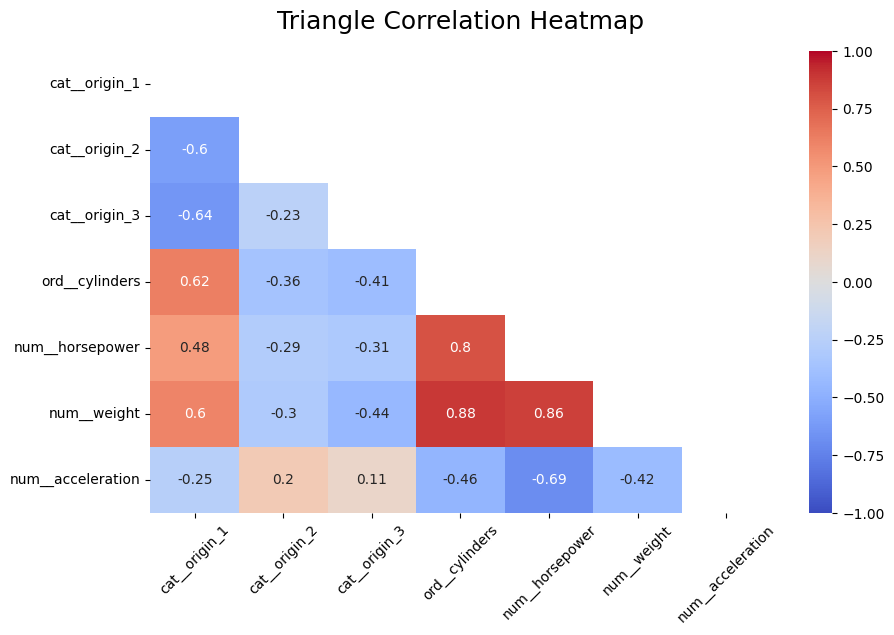

In [18]:
print(X_imp.corr())
plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_imp.corr()))
heatmap = sns.heatmap(X_imp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')#cmap='BrBG'
plt.xticks(rotation=45)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)


In [19]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder

# function for the ML pipeline as outlined above 
def MLpipe_KFold_RMSE(X, y, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    
    # lists to be returned 
    test_scores = []
    best_models = []
    y_tests = []
    X_tests = []
    y_others = []
    X_others = []


    for i in range(0,10):
        # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        y_tests.append(y_test)
        X_tests.append(X_test)
        y_others.append(y_other)
        X_others.append(X_other)
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
        pipe = Pipeline(steps=[('ML_algo', ML_algo)])
        grid = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
        grid.fit(X_other, y_other)
        best_model = grid.best_estimator_
        best_models.append(best_model)
        # Calculate the model's error on the test set
        y_pred = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        test_scores.append(test_rmse)
    # file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'wb')
    # pickle.dump((X_tests),file)
    # file.close()
    
    # file = open(r"C:\Users\Ruize Ma\1030_project_files\y_tests.txt", 'wb')
    # pickle.dump((y_tests),file)
    # file.close()

    # file = open(r"C:\Users\Ruize Ma\1030_project_files\y_others.txt", 'wb')
    # pickle.dump((y_others),file)
    # file.close()

    # file = open(r"C:\Users\Ruize Ma\1030_project_files\X_others.txt", 'wb')
    # pickle.dump((X_others),file)
    # file.close()

    np.random.seed(10)
    return test_scores, best_models


In [57]:
from sklearn.linear_model import Lasso
model_name = []
mean_scores = []
std_scores = []
min_scores = []

# ML Algorithm: Linear Regression with L1 regularization (Lasso)
ML_algo = Lasso()

# Parameter grid for hyperparameter tuning
param_grid = {
    'ML_algo__alpha': [ 0.001, 0.01, 0.1, 1, 10, 100]}

# Test the function
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, ML_algo, param_grid)
scores = []
best_models_lasso = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\lasso_models.txt", 'wb')
# pickle.dump((best_models_lasso),file)
# file.close()
model_name.append('Lasso')
Lasso_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [58]:
from sklearn.linear_model import Ridge



lin_reg = Ridge()
param_grid = {
    'ML_algo__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, lin_reg, param_grid)
best_models_ridge = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\ridge_models.txt", 'wb')
# pickle.dump((best_models_ridge),file)
# file.close()
model_name.append('Ridge')
Ridge_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [59]:
#linear regression with an elastic net
from sklearn.linear_model import ElasticNet
model = ElasticNet()
alphas = np.logspace(5, 7, 6)
param_grid = {
    'ML_algo__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'ML_algo__l1_ratio': np.linspace(0.2, 0.8, 3)
}
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, model, param_grid)
best_models_elastic = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\elastic_models.txt", 'wb')
# pickle.dump((best_models_elastic),file)
# file.close()
model_name.append('elastic net')
Elastic_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [60]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
                'ML_algo__max_depth': [None, 1, 3, 10, 20],
                'ML_algo__max_features': [None, 1,3,10,20]
              }
reg_RF = RandomForestRegressor()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg_RF, param_grid)
best_models_rf = best_models
# file = open(r"C:\Users\Ruize Ma\1030_project_files\rf_models.txt", 'wb')
# pickle.dump((best_models_rf),file)
# file.close()
model_name.append('RF')
RF_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [61]:
from sklearn.svm import SVR
param_grid = {
                'ML_algo__gamma': [1e-3, 1e0, 1e1, 1e3, 1e5],
                'ML_algo__C': [1e-1, 1e0]
}
reg = SVR()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg, param_grid)
best_models_svr = best_models
model_name.append('SVR')
# file = open(r"C:\Users\Ruize Ma\1030_project_files\svr_models.txt", 'wb')
# pickle.dump((best_models_svr),file)
# file.close()
SVR_scores = test_scores
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [62]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
                'ML_algo__n_neighbors': [1, 10, 30, 50, 70, 100],
                'ML_algo__weights': ["uniform", "distance"]
              }
reg = KNeighborsRegressor()
test_scores, best_models = MLpipe_KFold_RMSE(X_imp, y, reg, param_grid)
best_models_knn = best_models
model_name.append('KNN')
KNN_scores = test_scores
# file = open(r"C:\Users\Ruize Ma\1030_project_files\knn_models.txt", 'wb')
# pickle.dump((best_models_knn),file)
# file.close()
mean_scores.append(np.mean(test_scores))
std_scores.append(np.std(test_scores))
min_scores.append(np.min(test_scores))

In [63]:
#Define preprocessor for XGB
num_ftrs = ['horsepower', 'weight', 'acceleration']
cat_ftrs = ['origin']
ordinal_ftrs = ['cylinders']
ordinal_cats = ['3', '4', '5', '6', '8']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = [ordinal_cats]))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

param_grid = {
    'ML_algo__learning_rate': [0.05, 0.1, 0.15],
    'ML_algo__n_estimators': [100, 200, 300],
    'ML_algo__missing': [np.nan],
    'ML_algo__max_depth': [3, 4, 5]
}

random_states = [i for i in range(10)]
test_score_list = []
best_model_list = []
y_test_pred_set = []

for i in random_states:
    # 1. Split the data into training and testing sets
    X_other_xgb, X_test_xgb, y_other_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42*i)
    
    # 2. Preprocess the data
    prep = Pipeline(steps=[('preprocessor', preprocessor), ('ML_algo', XGBRegressor(eval_metric='logloss'))])

    # 3. Train XGBoost classifier and tune hyperparameter by using GridsearchCV
    kf = KFold(n_splits=4, shuffle=True, random_state=42*i)
    
    # Lists to store validation sets for each fold
    eval_sets = []
    
    for train_index, val_index in kf.split(X_other_xgb):
        X_train_fold, X_val_fold = X_other_xgb.iloc[train_index], X_other_xgb.iloc[val_index]
        y_train_fold, y_val_fold = y_other_xgb.iloc[train_index], y_other_xgb.iloc[val_index]
        
        eval_sets.append((X_val_fold, y_val_fold))
    
    grid_search = GridSearchCV(estimator=prep, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf,
                               return_train_score=True, verbose=False)

    grid_search.fit(X_other_xgb, y_other_xgb)

    # 4. Get the best model
    best_model = grid_search.best_estimator_

    # 5. Save train and test scores
    test_preds = best_model.predict(X_test_xgb)
    y_test_pred_set.append(pd.DataFrame(data=test_preds))

    best_model_list.append(best_model)
    test_score_list.append(np.sqrt(mean_squared_error(y_test_xgb, test_preds)))

# Print results
print("Mean of test RMSE over 10 random states:", np.mean(test_score_list))
print("Standard Deviation of test RMSE over 10 random states:", np.std(test_score_list))


Mean of test RMSE over 10 random states: 4.062775087036941
Standard Deviation of test RMSE over 10 random states: 0.485649909101623


In [65]:
model_name.append('XGBoost')
XGB_scores = test_score_list
mean_scores.append(np.mean( test_score_list))
std_scores.append(np.std( test_score_list))
min_scores.append(np.min( test_score_list))

# file = open(r"C:\Users\Ruize Ma\1030_project_files\XGB_models.txt", 'wb')
# pickle.dump((best_model_list),file)
# file.close()

In [67]:
score_result = list(zip(model_name, mean_scores, std_scores, min_scores))
# file = open(r"C:\Users\Ruize Ma\1030_project_files\scores.txt", 'wb')
# pickle.dump((score_result),file)
# file.close()
result = pd.DataFrame(score_result, columns=['model_name', 'mean_score', 'std_score', 'min_score'])
result


,model_name,mean_score,std_score,min_score
0,Lasso,4.294000,0.395294,3.719525
1,Ridge,4.301550,0.399239,3.701281
2,elastic net,4.302919,0.397245,3.713224
3,RF,3.982116,0.405250,3.145381
4,SVR,4.368325,0.457666,3.551674
5,KNN,3.997401,0.486883,3.424036
6,XGBoost,4.062775,0.485650,3.145672


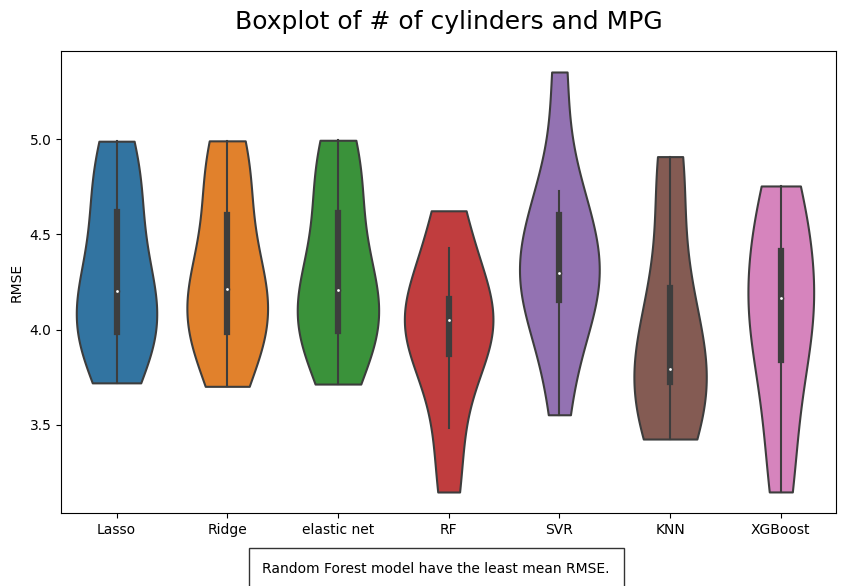

In [71]:
all_scores = list(zip(Lasso_scores, Ridge_scores, Elastic_scores, RF_scores, SVR_scores, KNN_scores, XGB_scores))
all_scores = pd.DataFrame(all_scores, columns = model_name)
all_scores
#save all scores
# file = open(r"C:\Users\Ruize Ma\1030_project_files\all_scores.txt", 'wb')
# pickle.dump((all_scores),file)
# file.close()

## RUN FROM HERE

In [20]:
#get the splitted set
file = open(r"C:\Users\Ruize Ma\1030_project_files\rf_models.txt", 'rb')
best_models_rf = pickle.load(file)
file.close()
best_models_rf[1]
file = open(r"C:\Users\Ruize Ma\1030_project_files\X_tests.txt", 'rb')
X_tests = pickle.load(file)
file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\y_tests.txt", 'rb')
y_tests = pickle.load(file)
file.close()

file = open(r"C:\Users\Ruize Ma\1030_project_files\X_others.txt", 'rb')
X_others = pickle.load(file)
file.close()
file = open(r"C:\Users\Ruize Ma\1030_project_files\y_others.txt", 'rb')
y_others = pickle.load(file)
file.close()

X_test = X_tests[1]
y_test = y_tests[1]
X_other = X_others[1]
y_other = y_others[1]


In [21]:
file = open(r"C:\Users\Ruize Ma\1030_project_files\scores.txt", 'rb')
scores_summary = pickle.load(file)
file.close()
score_resultbymin = sorted(scores_summary, key=lambda x: x[3], reverse = False)
print(score_resultbymin)
score_resultbymean = sorted(scores_summary, key=lambda x: x[1], reverse = False)
print(score_resultbymean)
score_resultbystd = sorted(scores_summary, key=lambda x: x[2], reverse = False)
print(score_resultbystd)
print(f"The model with least mean RMSE is {score_resultbymean[0][0]}.")
print(f"The model with least min RMSE is {score_resultbymin[0][0]}.")
print(f"The model with least std RMSE is {score_resultbystd[0][0]}.")

[('RF', 3.982115985645079, 0.40525020542058127, 3.145381320766876), ('XGBoost', 4.062775087036941, 0.485649909101623, 3.1456721768607014), ('KNN', 3.997401118725225, 0.4868825171770935, 3.424035617743712), ('SVR', 4.368324802096358, 0.45766627654141084, 3.5516736227413555), ('Ridge', 4.3015495430576625, 0.3992390081831224, 3.701281046734809), ('elastic net', 4.302918957749707, 0.3972446605626859, 3.713223844551931), ('Lasso', 4.293999801257709, 0.3952937944488695, 3.719524869555253)]
[('RF', 3.982115985645079, 0.40525020542058127, 3.145381320766876), ('KNN', 3.997401118725225, 0.4868825171770935, 3.424035617743712), ('XGBoost', 4.062775087036941, 0.485649909101623, 3.1456721768607014), ('Lasso', 4.293999801257709, 0.3952937944488695, 3.719524869555253), ('Ridge', 4.3015495430576625, 0.3992390081831224, 3.701281046734809), ('elastic net', 4.302918957749707, 0.3972446605626859, 3.713223844551931), ('SVR', 4.368324802096358, 0.45766627654141084, 3.5516736227413555)]
[('Lasso', 4.293999801

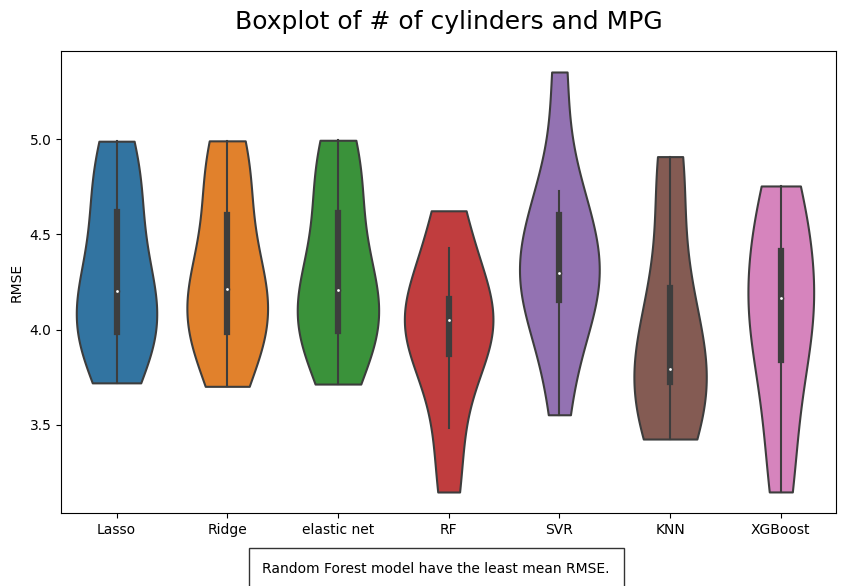

In [22]:
file = open(r"C:\Users\Ruize Ma\1030_project_files\all_scores.txt", 'rb')
all_scores = pickle.load(file)
file.close()
plt.figure(figsize=(10,6))
plt.ylabel('RMSE')
graph = sns.violinplot(data = all_scores, 
                       cut = 0).set_title('Boxplot of # of cylinders and MPG', fontdict={'fontsize':18}, pad=16)
plt.figtext(0.5, 0.01, "Random Forest model have the least mean RMSE.",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\box_models", dpi=300)
plt.show()

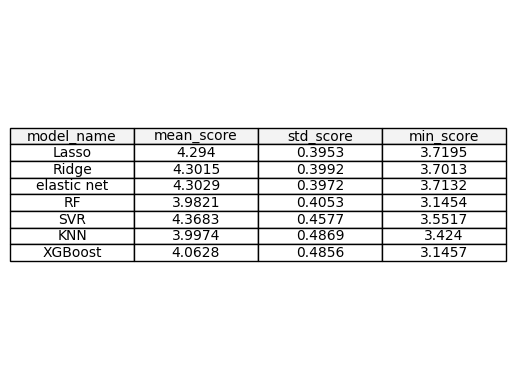

In [23]:

result = pd.DataFrame(scores_summary, columns=['model_name', 'mean_score', 'std_score', 'min_score'])
result = result.round(4)
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center', colColours=['#f3f3f3']*result.shape[1])
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\score_table", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
baseline_rmses = []
for test in y_tests:
    
    y_mean = [np.mean(test)]*len(test)
    baseline_rmse = np.sqrt(mean_squared_error(test, y_mean))
    baseline_rmses.append(baseline_rmse)
bsl_mean = np.mean(baseline_rmses)
bsl_std = np.std(baseline_rmses)
print(bsl_mean, bsl_std)

7.857181475840849 0.42098029877112086


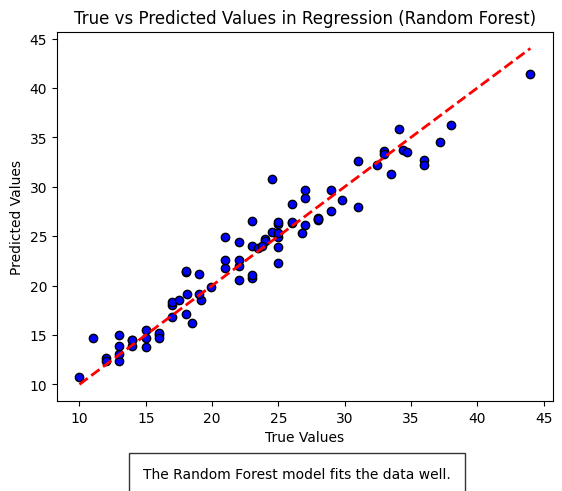

In [25]:
y_pred = best_models_rf[0].predict(X_test)
plt.scatter(y_test, y_pred, color='blue', edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values in Regression (Random Forest)')
# plt.savefig('True vs. Predicted.png', dpi=300)
plt.figtext(0.5, -0.05, "The Random Forest model fits the data well.",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\scatter_RF", dpi=300, bbox_inches='tight')
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


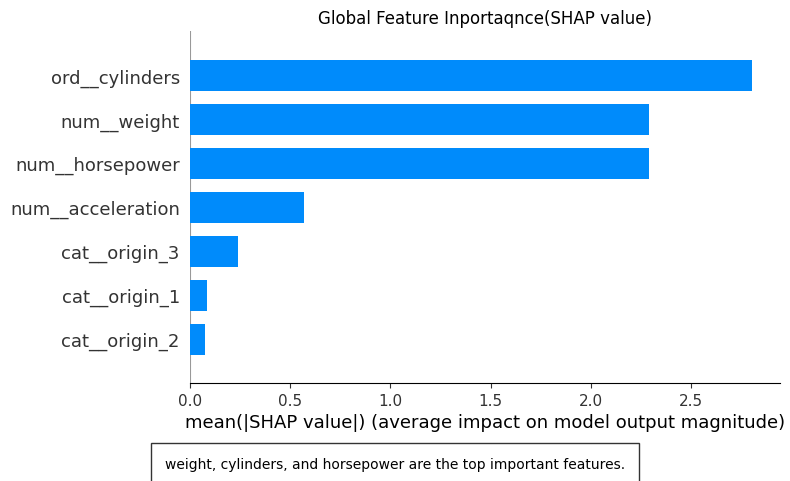

In [26]:
import shap
feature_names = X_imp.columns
model_rf = best_models_rf[1].named_steps['ML_algo']
explainer = shap.Explainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,feature_names = feature_names, plot_type='bar',show = False)
plt.title('Global Feature Inportaqnce(SHAP value)')
plt.figtext(0.5, -0.05, "weight, cylinders, and horsepower are the top important features.",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\mean_abs_shap", dpi=300, bbox_inches='tight')
plt.show()

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
beseline_r2 = r2_score(y_test,best_models_rf[1].predict(X_test))
baseline_rmse = np.sqrt(mean_squared_error(best_models_rf[1].predict(X_test), y_test))
print(beseline_r2, baseline_rmse)

0.7744555323331076 3.482344602984556


In [28]:
# np.random.seed(20)
ftrs = X_test.columns
nr_runs = 10
scores_rmse = np.zeros([len(ftrs),nr_runs])
scores = np.zeros([len(ftrs),nr_runs])
for i in range(len(ftrs)):
    print('shuffling '+str(ftrs[i]))
    R2s = []
    RMSEs = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftrs[i]] = np.random.permutation(X_test[ftrs[i]].values)
        y_test_pred = best_models_rf[1].predict(X_test_shuffled)
        R2s.append(r2_score(y_test, y_test_pred))
        RMSEs.append(np.sqrt(mean_squared_error(y_test,y_test_pred)))
    print(' shuffled test score:',np.around(np.mean(R2s),3),'+/-',np.around(np.std(R2s),3))
    scores[i] = R2s
    print(' shuffled test score:',np.around(np.mean(RMSEs),3),'+/-',np.around(np.std(RMSEs),3))
    scores_rmse[i] = RMSEs

shuffling cat__origin_1
 shuffled test score: 0.77 +/- 0.004
 shuffled test score: 3.518 +/- 0.029
shuffling cat__origin_2
 shuffled test score: 0.772 +/- 0.003
 shuffled test score: 3.502 +/- 0.024
shuffling cat__origin_3
 shuffled test score: 0.758 +/- 0.007
 shuffled test score: 3.605 +/- 0.054
shuffling ord__cylinders
 shuffled test score: 0.601 +/- 0.042
 shuffled test score: 4.624 +/- 0.245
shuffling num__horsepower
 shuffled test score: 0.476 +/- 0.056
 shuffled test score: 5.301 +/- 0.279
shuffling num__weight
 shuffled test score: 0.561 +/- 0.057
 shuffled test score: 4.849 +/- 0.316
shuffling num__acceleration
 shuffled test score: 0.733 +/- 0.019
 shuffled test score: 3.786 +/- 0.138


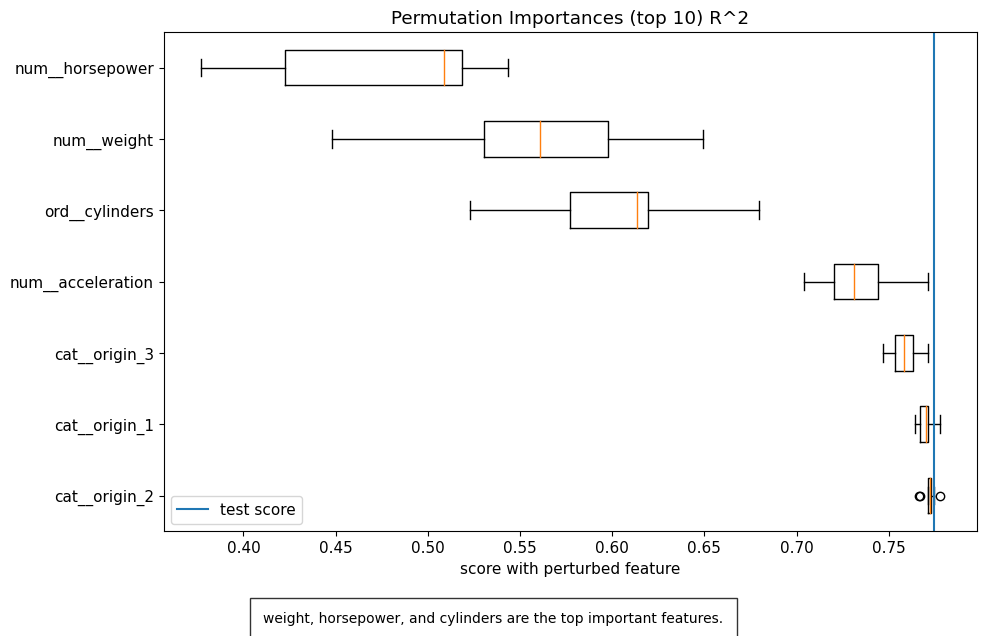

In [29]:
import matplotlib.pylab as plt

sorted_scores = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(scores[sorted_scores[-10:]].T,labels=ftrs[sorted_scores[-10:]],vert=False)
plt.axvline(beseline_r2,label='test score')
plt.title("Permutation Importances (top 10) R^2")
plt.xlabel('score with perturbed feature')
plt.legend()
# plt.savefig('Permutation_box.png', dpi=300)
plt.tight_layout()
plt.figtext(0.5, -0.05, "weight, horsepower, and cylinders are the top important features.",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\perm_r2", dpi=300, bbox_inches='tight')
plt.show()

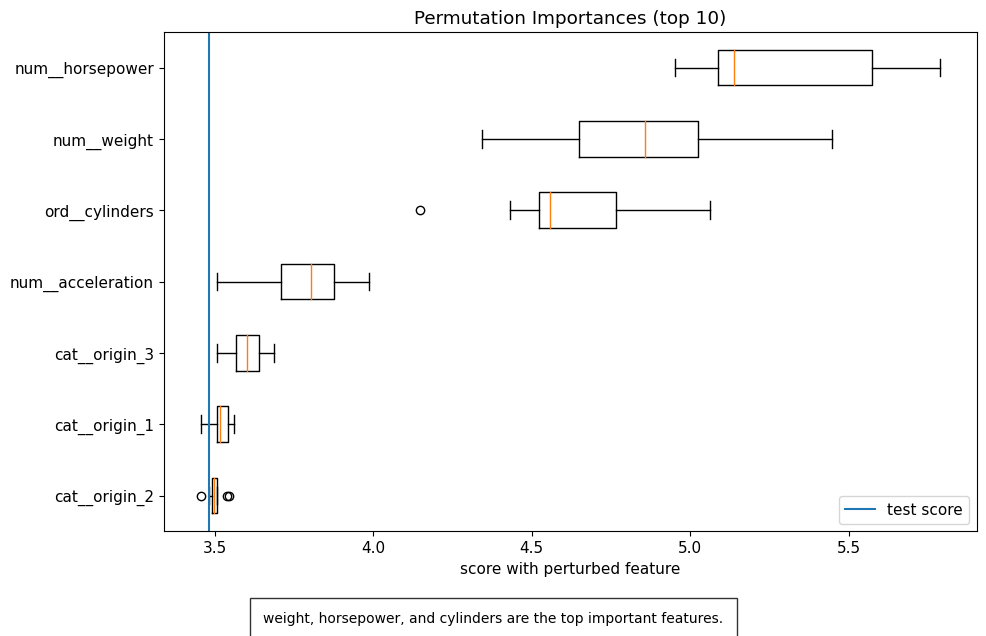

In [30]:
import matplotlib.pylab as plt

sorted_scores = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10,6))
plt.boxplot(scores_rmse[sorted_scores[-10:]].T,labels=ftrs[sorted_scores[-10:]],vert=False)
plt.axvline(baseline_rmse,label='test score')
plt.title("Permutation Importances (top 10)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.figtext(0.5, -0.05, "weight, horsepower, and cylinders are the top important features.",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\perm_rmse", dpi=300, bbox_inches='tight')
plt.show()

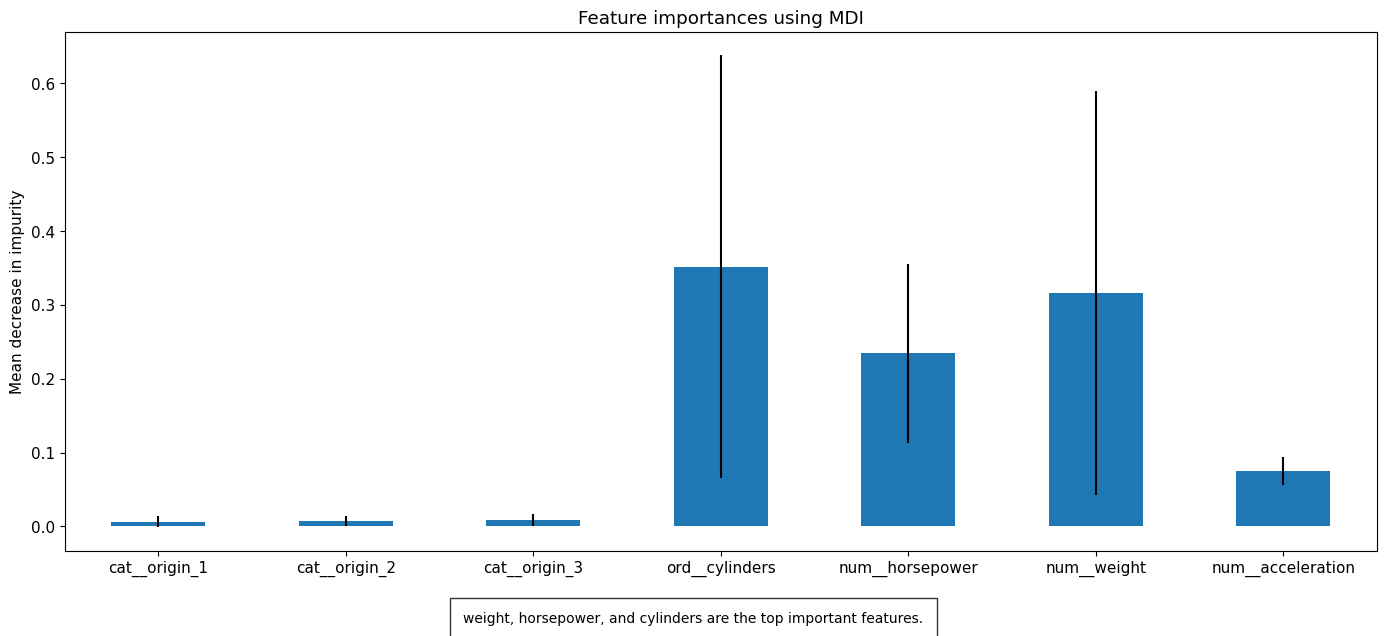

In [31]:
import time
forest = model_rf
importances = model_rf.feature_importances_
start_time = time.time()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize = (14,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.xticks(rotation = 0)
fig.tight_layout()
# plt.savefig('RF_MDI.png', dpi=300)
plt.figtext(0.5, -0.05, "weight, horsepower, and cylinders are the top important features.",
            ha='center', fontsize=10, bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\MDI", dpi=300, bbox_inches='tight')
plt.show()

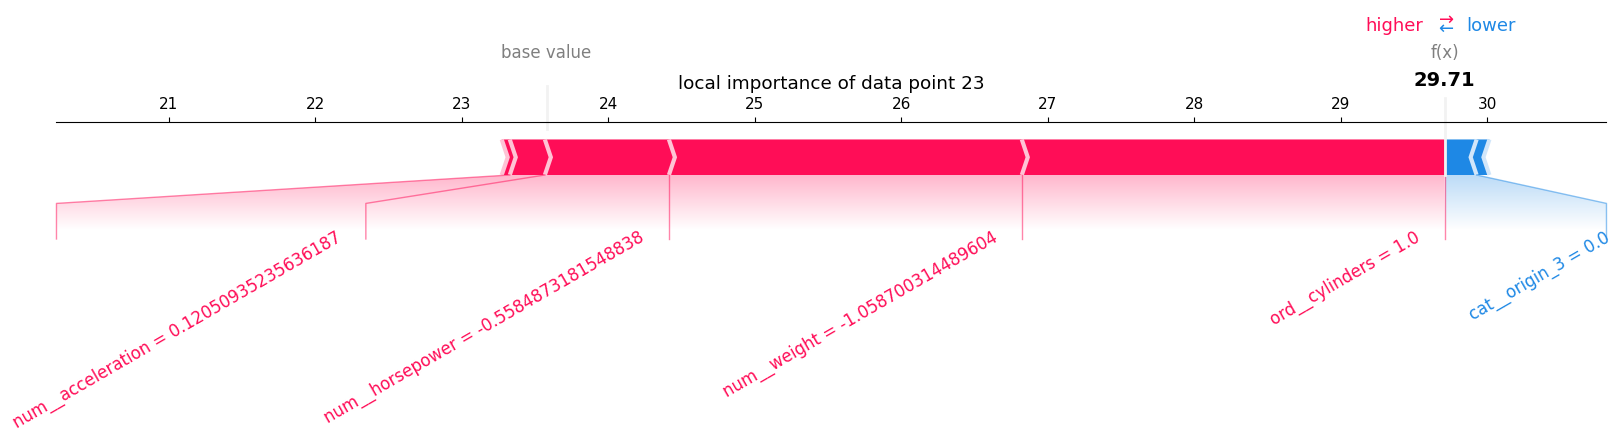

In [34]:
force_plot_1 = shap.force_plot(explainer.expected_value, shap_values[23, :], X_test.iloc[23, :], matplotlib = True, text_rotation = 30,show = False)

force_plot_1
# plt.savefig('force_plot_23', dpi=350,bbox_inches = 'tight')
plt.title('local importance of data point 23')
plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\local_shap_higher", dpi=300, bbox_inches='tight')
plt.show()

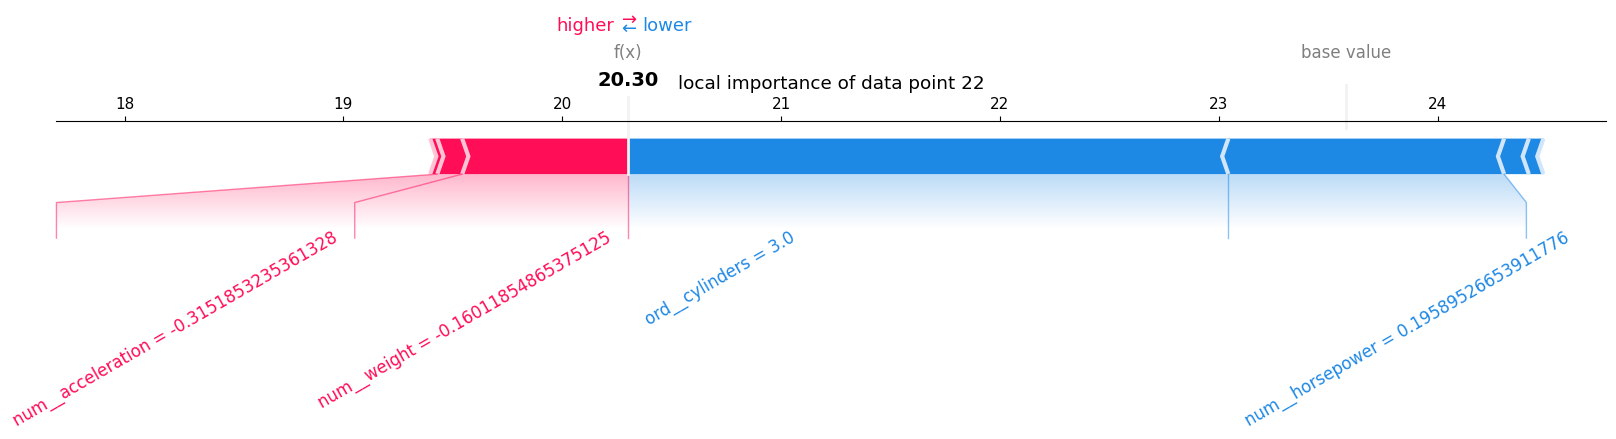

In [35]:
force_plot_20 = shap.force_plot(explainer.expected_value, shap_values[22, :], X_test.iloc[22, :], matplotlib = True, text_rotation = 30, show = False)

force_plot_20
# plt.savefig('force_plot_22', dpi=350,bbox_inches = 'tight')
plt.title('local importance of data point 22')

plt.savefig(r"D:\Desktop\Fall\DATA1030\project_report\figures\local_shap_lower", dpi=300, bbox_inches='tight')
plt.show()